In [22]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats
import warnings
warnings.filterwarnings("ignore", message="FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")


# Chargement des données

In [23]:
DATA = pd.read_csv('../DATA/movie_metadata3.csv', delimiter=';', index_col='movie_title')

# Affichage des différents genres de films 

**Question 1 :** 
Afficher les différents genres de films dans la base de données et le nombre de films dans chaque genre. On essaiera d'afficher les genres dans l'ordre décroissant, du plus représenté au moins représenté. 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

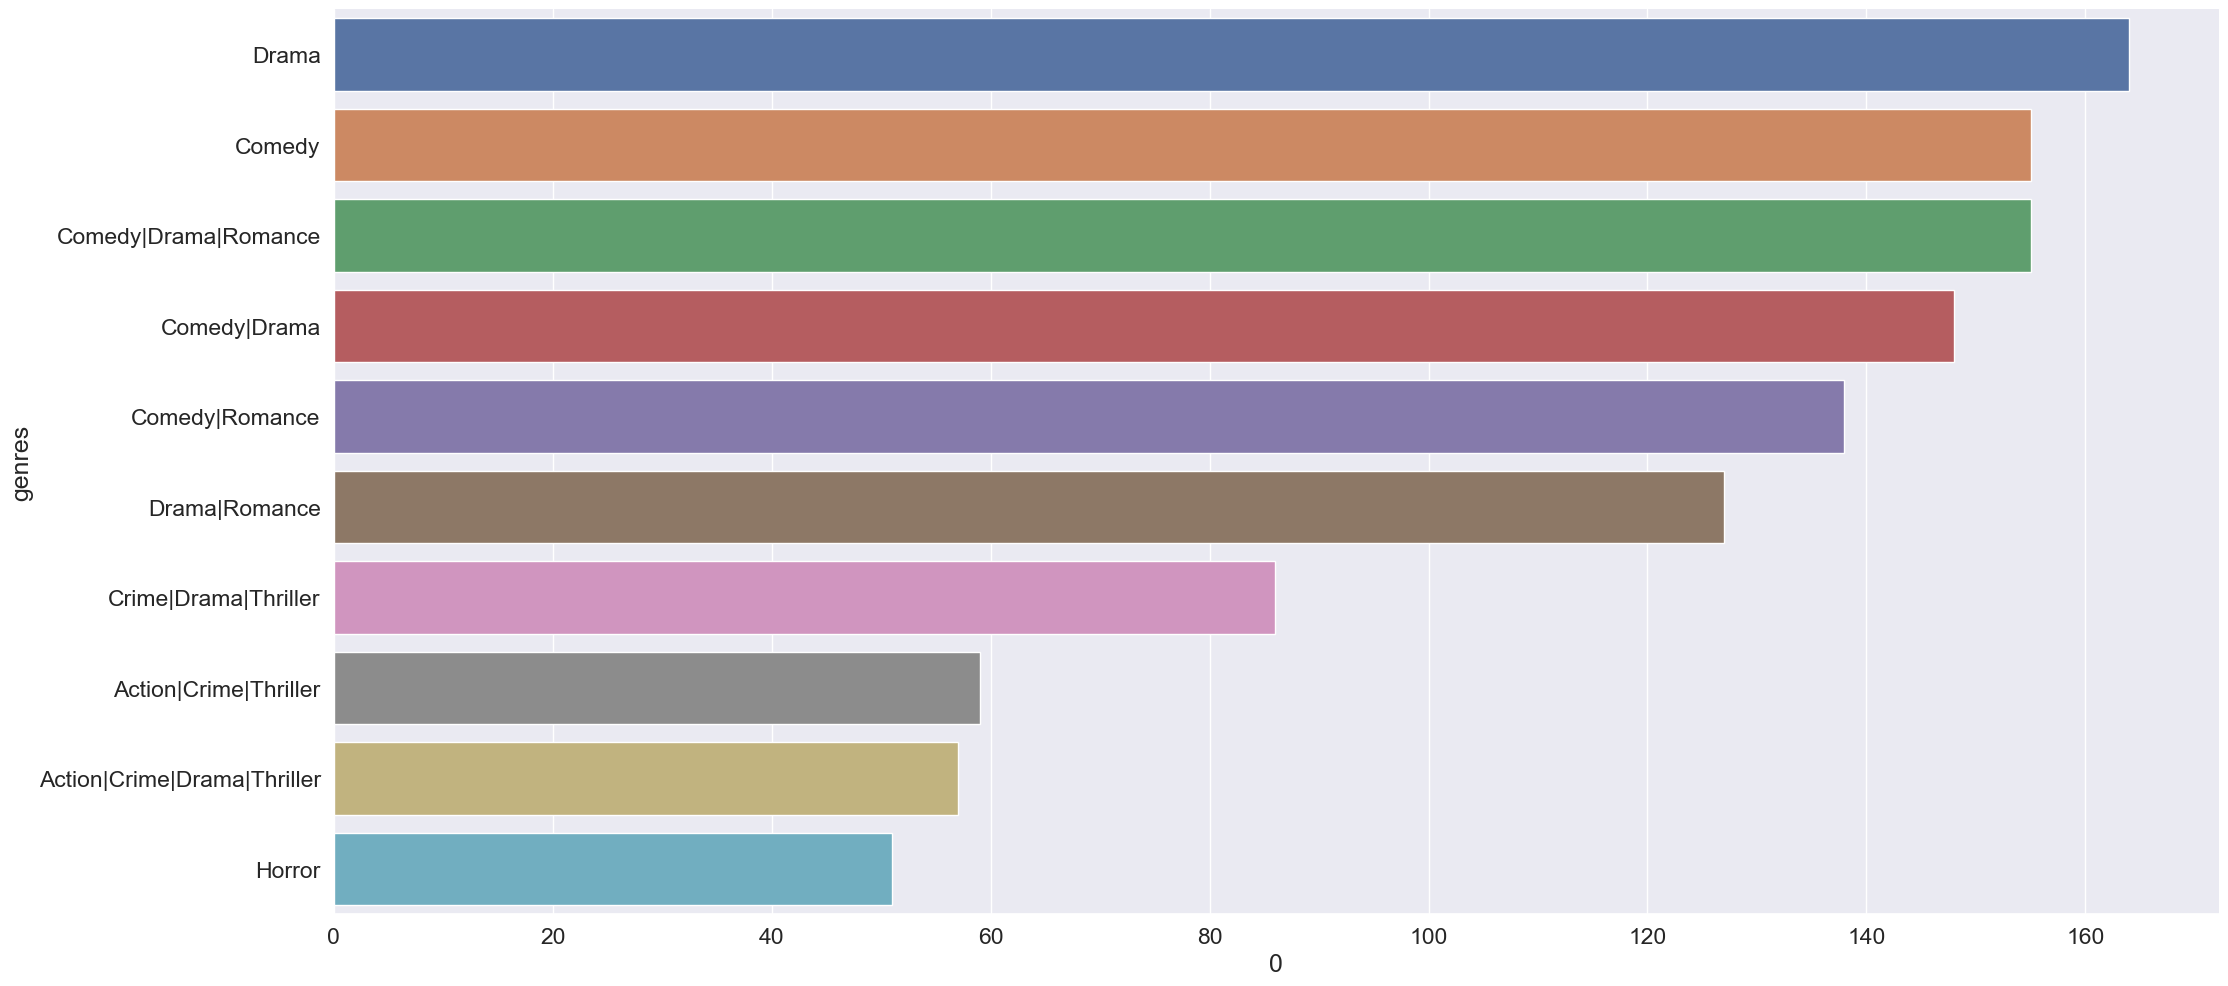

In [45]:
genre = DATA.groupby('genres').size().sort_values(ascending=False)
dfGenre = pd.DataFrame(data=genre)
dfGenre = dfGenre.iloc[:10] # Garder les 10 premiers genres
    
# Demander d'afficher ça dans un graphique est un peu compliqué
# car il y a trop de genres différents (notamment avec les combinaisons de genres)
# On pourrait par exemple se limiter aux 10 genres les plus représentés
sns.catplot(y=dfGenre.index, x=0, data=dfGenre, kind='bar', height=10, aspect=2)

**Question 2 :** On va considérer le genre principal comme étant le premier indiqué dans la colonne `genres`. On s'intéressera notamment aux genres suivants : 
* Fantasy
* Drama
* Action
* Horror
* Comedy
* Biography
* Crime
* Animation

L'objectif est de créer un nouveau DataFrame qu'on appelera `DATAgenre` avec une colonne supplémentaire 'genre_principal'. Pour cela le moyen le plus simple est de commencer à créer un DataFrame pour l'un des genres de la liste, d'ajouter le nom du genre principal dans la nouvelle colonne puis d'ajouter successivement dans ce nouveau DataFrame, les DataFrame contenant les films de chaque genre créés de la même façon. 

In [26]:
# Récupération des valeurs prises par genre
list_genres = list(set(DATA.genres.values)) # set enleve les doublons

# Algorithme de tri pour garder tous les genres de manière unique
list_genres_uniques = []
for genres in list_genres:
    sous_genre = genres.split("|")
    for sg in sous_genre:
        if sg not in list_genres_uniques:
            list_genres_uniques.append(sg)
            


list_of_genres = list(set(list_genres_uniques)) # set enleve les doublons
DATAgenre = DATA[DATA.genres.str.startswith('Fantasy', na=False)].copy()
DATAgenre['genre_principal'] = 'Fantasy'
for genre in list_of_genres:
    df = DATA[DATA.genres.str.startswith(genre, na=False)].copy()
    df['genre_principal'] = genre
    DATAgenre = DATAgenre.append(df) # Les df ne sont pas sensibles aux effets de bord
    
print(len(DATAgenre))
DATAgenre.tail()

4167


,director_name,num_critic_for_reviews,duration,actor_1_name,actor_2_name,num_voted_users,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,genres,plot_keywords,genre_principal
movie_title,,,,,,,,,,,,,,,,,
Penitentiary,Jamaa Fanaka,23,99,Leon Isaac Kennedy,Chuck Mitchell,509,2,10,English,USA,R,100000,1979,5.8,Crime|Drama|Sport,blaxploitation|boxing|convict|drifter|false ac...,Crime
Hayride,Terron R. Parsons,13,93,Richard Tyson,Jeremy Sande,485,0,5,English,USA,Not Rated,60000,2012,3.4,Crime|Drama|Horror,NaN,Crime
Straight Out of Brooklyn,Matty Rich,8,91,Lawrence Gilliard Jr.,George T. Odom,475,4,11,English,USA,R,450000,1991,5.9,Crime|Drama,domestic violence|housing project|new york cit...,Crime
The King of Najayo,Fernando Baez Mella,1,101,Manny Perez,Christian Alvarez,197,1,1,Spanish,Dominican Republic,R,500000,2012,6.9,Crime|Drama,NaN,Crime
Mi America,Robert Fontaine,4,125,Michael Derek,Arturo Castro,22,0,1,English,USA,R,2100000,2015,7.2,Crime|Drama,NaN,Crime


# Score moyen en fonction du genre du film

**Question 3 :** Donner une représentation graphique permettant de comparer le comportement des films en terme de score sur le site imdb. 

<AxesSubplot: xlabel='imdb_score', ylabel='genre_principal'>

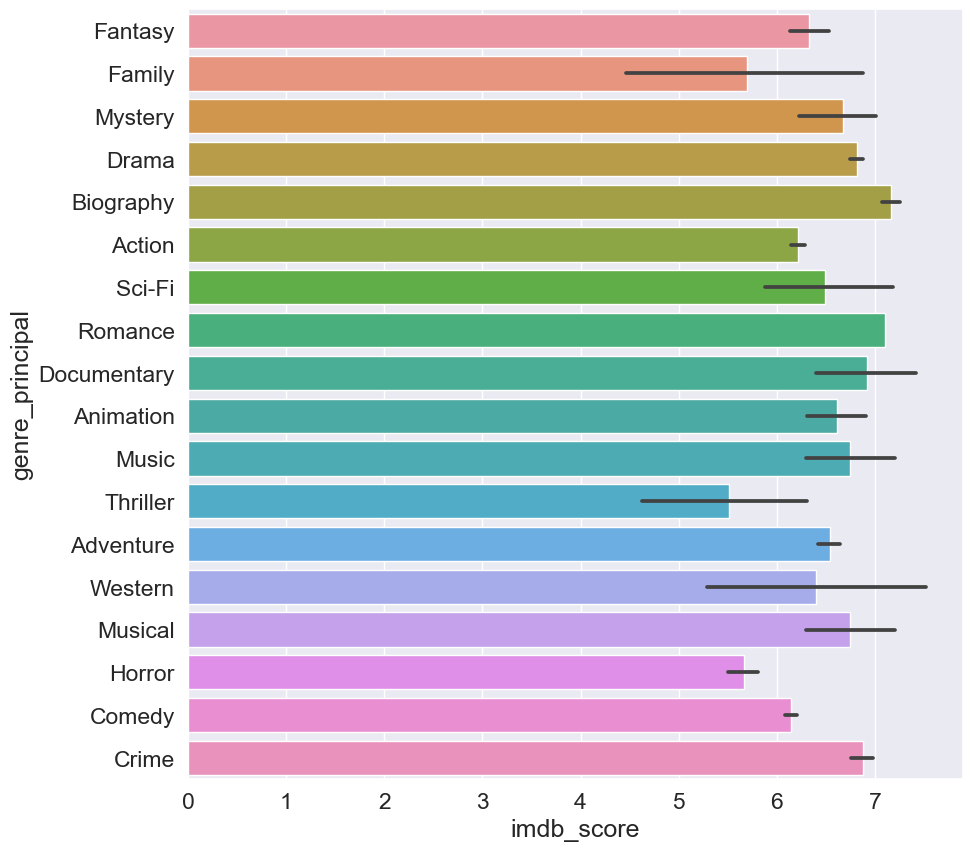

In [40]:
# On peut maintenant faire un graphique avec les genres en fonction des scores
plt.figure(figsize=(10, 10))
sns.barplot(y="genre_principal", x="imdb_score", data=DATAgenre)

# Budget en fonction du genre du film

**Question 4 :** Donner une représentation graphique permettant de comparer le comportement des films en terme de budget sur le site imdb. Que dire de la relation entre le genre du film et le budget ? 

<AxesSubplot: xlabel='budget', ylabel='genre_principal'>

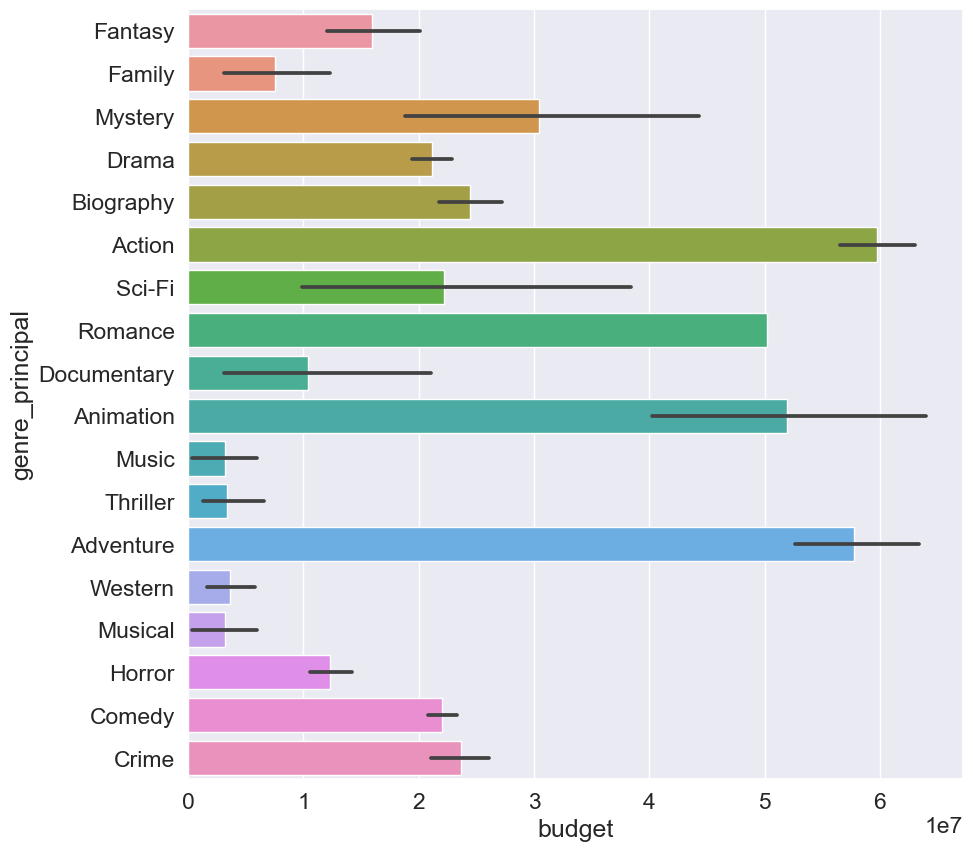

In [41]:
# On peut maintenant faire un graphique avec les genres en fonction des budgets
plt.figure(figsize=(10, 10))
sns.barplot(y="genre_principal", x="budget", data=DATAgenre)

**Question 5 :** Visualiser la distribution du budget pour les films d'action. Que peut-on dire de la médiane et de la moyenne du budget pour les films d'action. Comment expliquer la valeur moyenne du budget des films d'action ? Essayer de trouver la loi paramétrique qui modélise le mieux l'histogramme. 

<AxesSubplot: xlabel='budget', ylabel='movie_title'>

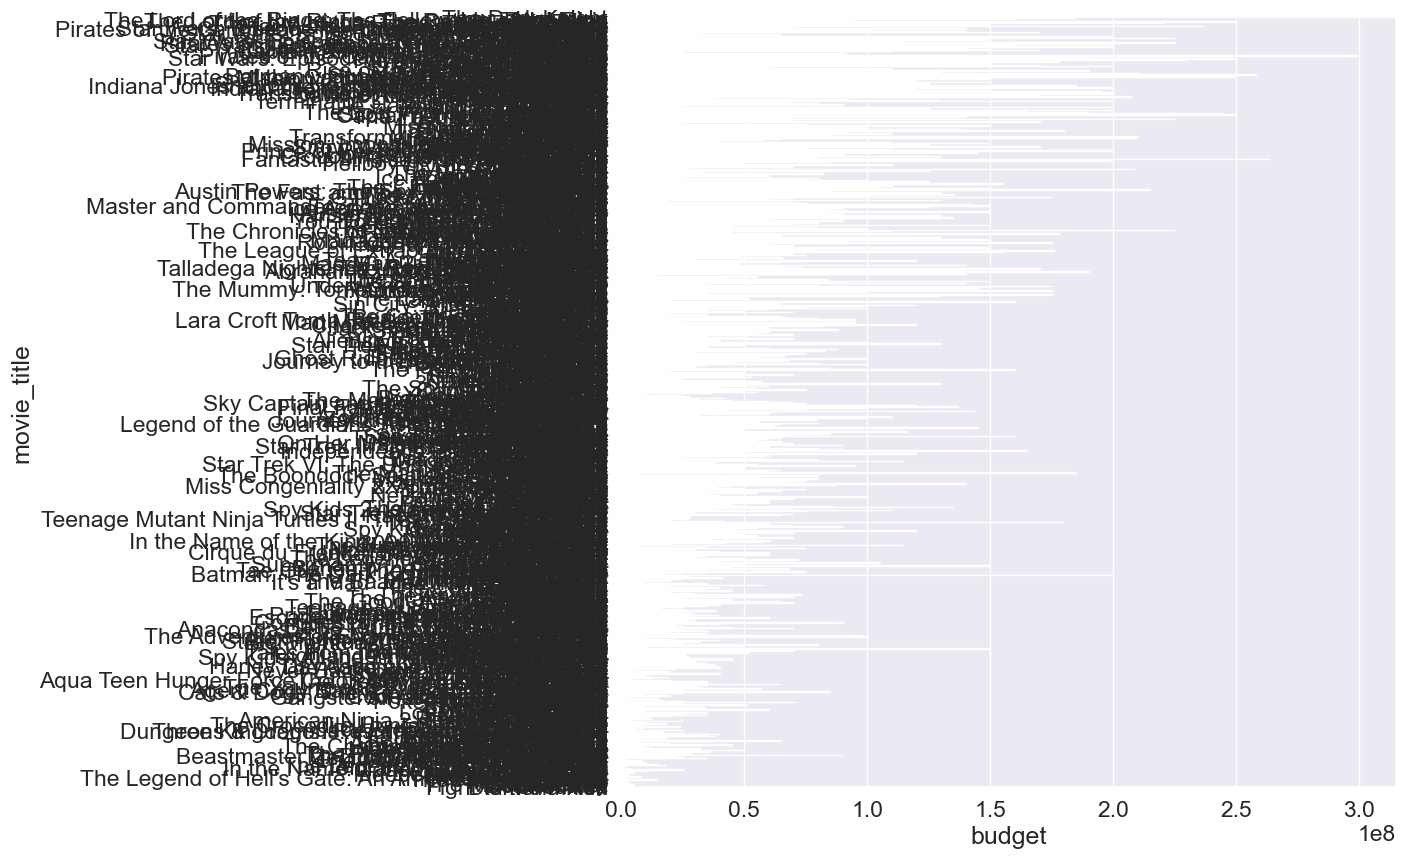

In [48]:
action_films = DATA[DATA.genres.str.startswith('Action', na=False)].copy()
action_films.head()
plt.figure(figsize=(10, 10))
sns.barplot(y=action_films.index, x="budget", data=action_films)

**Question 6 :** Comment évolue le budget des films historiques au cours du temps ? 

<AxesSubplot: xlabel='title_year', ylabel='budget'>

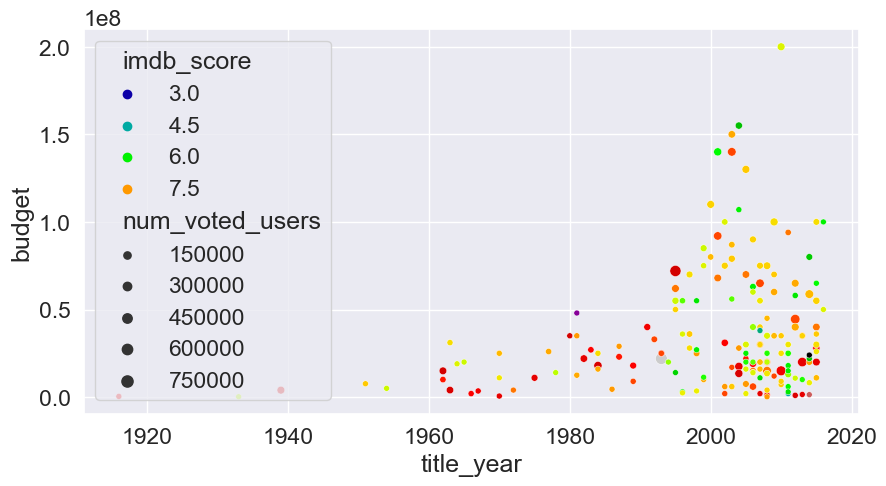

In [53]:
historyMovies = DATA[(DATA.genres.str.contains('History', na=False)) | (DATA.plot_keywords.str.contains('Histor', na=False))].copy()
plt.figure(figsize=(10,5))
sns.scatterplot(x='title_year', y="budget", data=historyMovies, palette='nipy_spectral', hue = 'imdb_score', size='num_voted_users')

On peut essayer d'expliquer une tendance de point grace `size` ou alors `hue`. 

En sciences des données on souhaite **montrer** les tendances mais aussi les **expliquer**.

**Question 7 :** Comment évolue le budget moyen par année pour les films historiques ? 

<AxesSubplot: xlabel='title_year'>

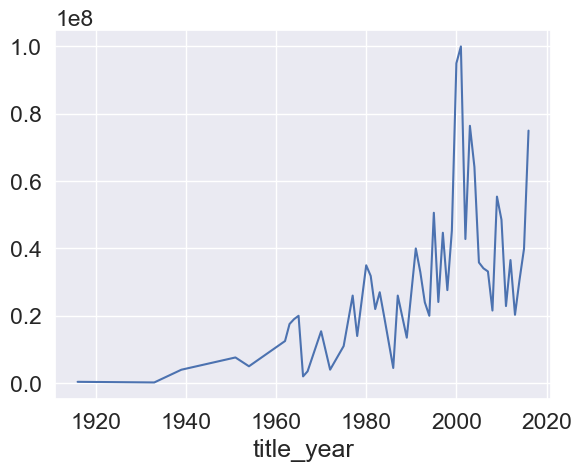

In [57]:
meanBudget = historyMovies.groupby('title_year')['budget'].mean()
meanBudget.plot() # On peut aussi utiliser sns.lineplot

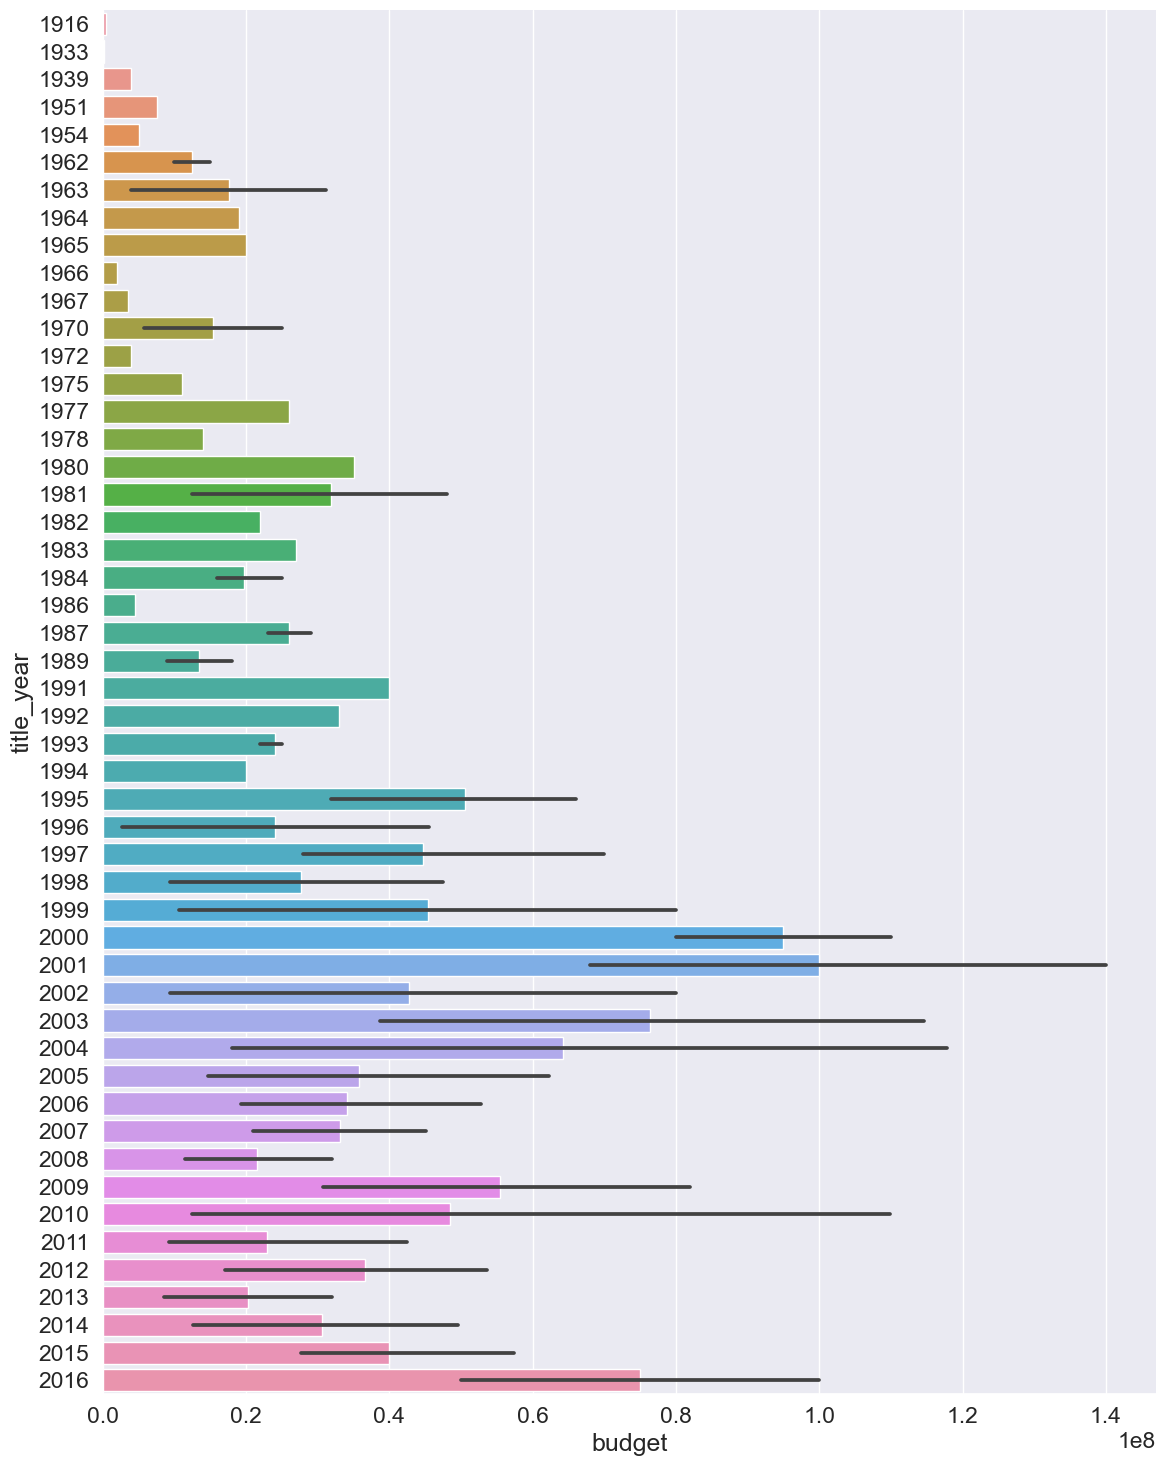

In [68]:
sns.catplot(data=historyMovies, y='title_year', x='budget', kind='bar', height=15, aspect=0.8, orient='h')

**Question 8 :** Comment expliquer la forte augmentation entre 1999 et 2001 ? 

**Réponse :**

>Plusieurs raisons peuvent expliquer un budget moyen élevé:

* La présence de quelques films avec un très gros budget comparé au reste des films les autres années: la moyenne est sensible aux valeurs extrêmes.


**Question 9 :** Comment évolue le budget moyen des films de science fiction ? 

**Question 10 :** Comment expliquer le pic en 1978 et le second en 1980 ? 

**Question 11 :** Quels sont les genres de film qui ont subi la plus forte augmentation de budget dans le DataFrame `DATAgenre` ?  

**Question 12 :** Comment expliquer l'allure étrange de la courbe de budget moyen pour les films d'animation ?